<table align='center' width=100%>
    <tr bgcolor='pink'>
        <td width='15%'>
            <img src='logo.png'>
        </td>
        <td>
            <div align='center'>
                <font color='teal' size=8px >
                    <b>TELECOM RETENTION
                    </b>
                </font><br>
                <font color='teal' size=4px >
                    <b>USING DATA SCIENCE  TO ADDRESS CUSTOMER CHURN
                    </b>
                </font>
            </div>    
        </td>
    </tr>
</table>

<b>Problem Statement -</b> Telecom Retention  is very helpful for company to identify its loyal customer  as well as to build new Strategies for customer who likely to churn. The 
objective of this model is to provide quick, immediate and easy way to spot customer who are going to churn in near future. It can provide insights that which metrics are useful in Customer retention.

In [49]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.metrics import roc_curve,plot_confusion_matrix,cohen_kappa_score
from sklearn.preprocessing import StandardScaler

#algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Feature Selection
from sklearn.feature_selection import RFE
# Parameter selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


pd.options.display.max_rows=None
pd.options.display.max_columns=None

# It is a class to perform over-sampling using SMOTE and cleaning using ENN.
from imblearn.combine import SMOTEENN 

# use pick to save model which can be further use for deployment .
import pickle

from warnings import filterwarnings
filterwarnings(action='ignore')

In [21]:
# Loading the dataset
tele_retention = pd.read_csv('tel_churn_visualize.csv')

In [22]:
tele_retention.head()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [23]:
# droping unnesscary column
dtele_retentionf = tele_retention.drop('Unnamed: 0',axis=1)

In [24]:
tele_retention.head()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [25]:
# Creating X and Y variable
# independent variables
X = tele_retention.drop('Churn',axis=1)


In [26]:
# dependent variable
y = tele_retention['Churn']


In [27]:
# Dividing the data set into training-test set 
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=10)

### Models

In [28]:
# model building
rf = RandomForestClassifier()
ad = AdaBoostClassifier()
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
lr = LogisticRegression()
base_learners = [('rf_model',RandomForestClassifier()),('dt',DecisionTreeClassifier())]
stack = StackingClassifier(estimators=base_learners,final_estimator=AdaBoostClassifier())
gb = GradientBoostingClassifier()
xgb = XGBClassifier(eval_metric='mlogloss')

In [29]:
# building various models and compare each.
models = [rf,ad,dt,kn,lr,stack,gb,xgb]
for model in models:
    model.fit(Xtrain,ytrain)
    y_pred = model.predict(Xtest)
    scores = cross_val_score(model,X,y,cv=5).mean().round(3)
    accuracy = metrics.accuracy_score(ytest,y_pred).round(3)
    ROC = metrics.roc_auc_score(ytest,y_pred).round(3)
    f1_score = metrics.f1_score(ytest,y_pred).round(3)
    print(model,'\n','Accuracy : ',accuracy,'\n','Mean CV score : ',scores,'\n','ROC score : ',ROC,'\n','F1-score : ',f1_score,'\n','Confusion Matrix : \n',confusion_matrix(ytest,y_pred),'\n')

RandomForestClassifier() 
 Accuracy :  0.809 
 Mean CV score :  0.79 
 ROC score :  0.728 
 F1-score :  0.601 
 Confusion Matrix : 
 [[935 111]
 [158 203]] 

AdaBoostClassifier() 
 Accuracy :  0.807 
 Mean CV score :  0.688 
 ROC score :  0.726 
 F1-score :  0.599 
 Confusion Matrix : 
 [[934 112]
 [159 202]] 

DecisionTreeClassifier() 
 Accuracy :  0.719 
 Mean CV score :  0.702 
 ROC score :  0.641 
 F1-score :  0.468 
 Confusion Matrix : 
 [[837 209]
 [187 174]] 

KNeighborsClassifier() 
 Accuracy :  0.738 
 Mean CV score :  0.663 
 ROC score :  0.583 
 F1-score :  0.342 
 Confusion Matrix : 
 [[942 104]
 [265  96]] 

LogisticRegression() 
 Accuracy :  0.811 
 Mean CV score :  0.805 
 ROC score :  0.737 
 F1-score :  0.613 
 Confusion Matrix : 
 [[930 116]
 [150 211]] 

StackingClassifier(estimators=[('rf_model', RandomForestClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=AdaBoostClassifier()) 
 Accuracy :  0.802 
 

In [55]:
# List of parameters for RandomForest.
params = [{'n_estimators':[100,150,200,250,300],'max_depth':[4,8,10,12]}]

In [56]:
# GridSearchCV search for Best parameter for algorithm
grid = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=10)
grid_model = grid.fit(Xtrain,ytrain)
grid_model.best_params_

{'max_depth': 12, 'n_estimators': 300}

In [32]:
# search for best parameters for Decision Tree.
tuned_parameters = [{'criterion':['gini','entropy'],
                     'max_depth':range(2,10),
                    'min_samples_split':range(3,10),
                    'min_samples_leaf':[1,2,3,4,5],
                   'max_features':['sqrt','log2']}]
gridsearch =GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=tuned_parameters,cv=10)
grid_model = grid.fit(Xtrain,ytrain)
grid_model.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [33]:
# search for best parameters for Adaboosting.
params_1 = [{
    'n_estimators':[10,20,30,50],
    'learning_rate':[.1,.5,1.0]
}]
grid = GridSearchCV(AdaBoostClassifier(),param_grid=params_1,cv=5)
grid_model = grid.fit(Xtrain,ytrain)
grid_model.best_params_

{'learning_rate': 0.5, 'n_estimators': 30}

In [34]:
sm = SMOTEENN()
X_resampled,y_resampled = sm.fit_resample(X,y)

In [35]:
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resampled,y_resampled,test_size=0.2)

In [58]:
# model building
rf = RandomForestClassifier(n_estimators=300,max_depth=12)
ad = AdaBoostClassifier(n_estimators=30,learning_rate=0.5)
dt = DecisionTreeClassifier(max_depth=10)
kn = KNeighborsClassifier()
lr = LogisticRegression()
base_learners = [('rf_model',RandomForestClassifier()),('dt',DecisionTreeClassifier())]
stack = StackingClassifier(estimators=base_learners,final_estimator=AdaBoostClassifier())
gb = GradientBoostingClassifier()
xgb = XGBClassifier(eval_metric='mlogloss')

In [59]:
# building various models and compare each.
models = [rf,ad,dt,kn,lr,stack,gb,xgb]
for model in models:
    model.fit(Xr_train,yr_train)
    yr_pred = model.predict(Xr_test)
    scores = cross_val_score(model,X_resampled,y_resampled,cv=5).mean().round(3)
    accuracy = metrics.accuracy_score(yr_test,yr_pred).round(3)
    ROC = metrics.roc_auc_score(yr_test,yr_pred).round(3)
    f1_score = metrics.f1_score(yr_test,yr_pred).round(3)
    print(model,'\n','Accuracy : ',accuracy,'\n','Mean CV score : ',scores,'\n','ROC score : ',ROC,'\n','F1-score : ',f1_score,'\n','Confusion Matrix : \n',confusion_matrix(yr_test,yr_pred),'\n')

RandomForestClassifier(max_depth=12, n_estimators=300) 
 Accuracy :  0.934 
 Mean CV score :  0.891 
 ROC score :  0.931 
 F1-score :  0.943 
 Confusion Matrix : 
 [[388  37]
 [ 29 549]] 

AdaBoostClassifier(learning_rate=0.5, n_estimators=30) 
 Accuracy :  0.898 
 Mean CV score :  0.74 
 ROC score :  0.891 
 F1-score :  0.914 
 Confusion Matrix : 
 [[359  66]
 [ 36 542]] 

DecisionTreeClassifier(max_depth=10) 
 Accuracy :  0.909 
 Mean CV score :  0.725 
 ROC score :  0.907 
 F1-score :  0.921 
 Confusion Matrix : 
 [[380  45]
 [ 46 532]] 

KNeighborsClassifier() 
 Accuracy :  0.922 
 Mean CV score :  0.622 
 ROC score :  0.918 
 F1-score :  0.934 
 Confusion Matrix : 
 [[377  48]
 [ 30 548]] 

LogisticRegression() 
 Accuracy :  0.913 
 Mean CV score :  0.864 
 ROC score :  0.911 
 F1-score :  0.925 
 Confusion Matrix : 
 [[381  44]
 [ 43 535]] 

StackingClassifier(estimators=[('rf_model', RandomForestClassifier()),
                               ('dt', DecisionTreeClassifier())],
   

In [ ]:
# importance Features

In [46]:
imp_fea = pd.DataFrame({'Features':X.columns,'Importance':rf.feature_importances_}).sort_values('Importance',ascending=False)

In [47]:
imp_fea

,Features,Importance
2,tenure,0.138417
37,Contract_Month-to-month,0.087325
4,TotalCharges,0.073905
46,tenure_group_1-12,0.059162
39,Contract_Two year,0.057592
3,MonthlyCharges,0.038774
32,StreamingTV_No internet service,0.033301
38,Contract_One year,0.032425
30,TechSupport_Yes,0.032039
21,OnlineSecurity_Yes,0.030250


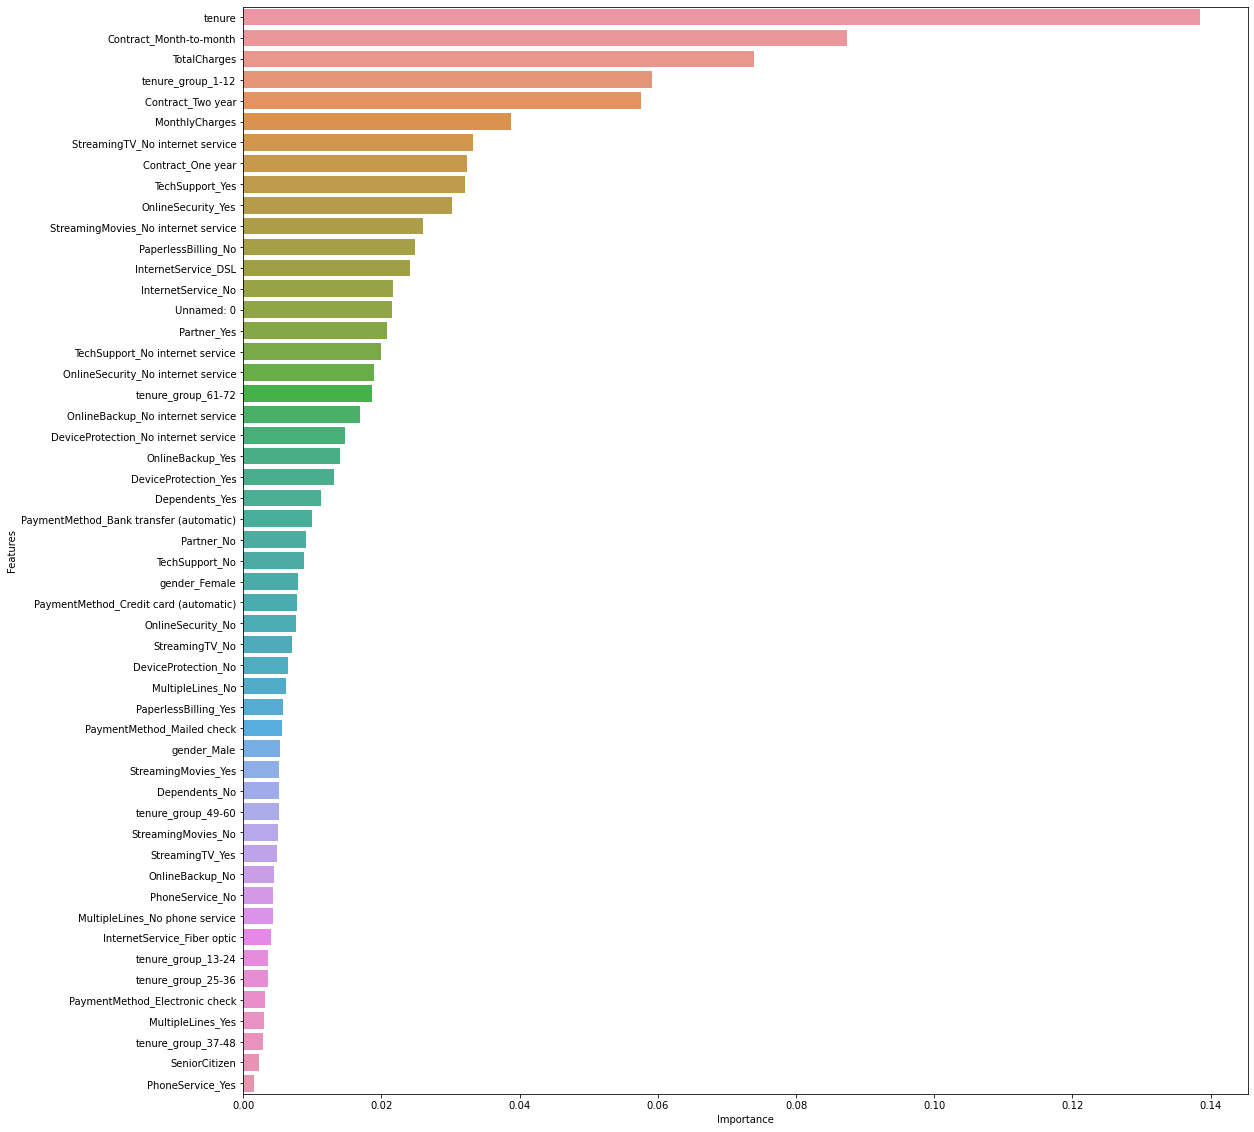

In [52]:
# plot for Showing important features
plt.figure(figsize=(18,20))
sns.barplot(imp_fea['Importance'],imp_fea['Features'])
plt.show()

From the above model ,Random Forest gives less False negative with 93.22% accuracy.<br>
So Random Forest is best suited algorithm for this dataset.
We can Futher add some parameter for random forest to make it more accurate.


In [ ]:
rf = RandomForestClassifier()

### Saving model

In [41]:
filename = 'model.sav'

In [43]:
pickle.dump(rf,open(filename,'wb'))   # write mode

In [44]:
load_model = pickle.load(open(filename,'rb'))

In [45]:
load_model.score(Xr_test,yr_test)

0.9322033898305084